# CSCA 5632 Final Project - Unsupervised and Supervised Learning on Animal Faces (AFHQ Dataset)
### By Moshiur Howlader
##### Github Link : https://github.com/Mosh333/csca5632-final-project

### 1. Introduction

In today’s data-driven world, the ability to **uncover structure and meaning from unlabeled data** represents one of the most powerful and important areas in machine learning.
While supervised learning depends on extensive labeled datasets, many real-world domains contain **vast quantities of raw, unannotated information**—such as images, text, medical scans, or sensor data—where manual labeling is costly or infeasible.  
Here, [**unsupervised learning**](https://biztechmagazine.com/article/2025/05/what-are-benefits-unsupervised-machine-learning-and-clustering-perfcon) plays a pivotal role: it enables algorithms to reveal hidden patterns, latent representations, and natural groupings within data without external supervision.

Unsupervised learning drives [innovation across diverse domains](https://pmc.ncbi.nlm.nih.gov/articles/PMC7983091/):

- [**Data exploration and pattern discovery:**](https://analyticalsciencejournals.onlinelibrary.wiley.com/doi/pdfdirect/10.1002/mas.21602) Enables open-ended analysis of large, high-dimensional datasets to uncover hidden structures, correlations, and trends—reducing dimensionality and aiding human interpretation, such as exploring mass spectrometry data across large experimental datasets.  
- [**Computer vision:**](https://viso.ai/deep-learning/supervised-vs-unsupervised-learning/) Groups unlabeled images by similarity, compresses data via [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), or learns visual embeddings through self-supervised methods like [SimCLR](https://arxiv.org/abs/2002.05709).  
- [**Natural language processing:**](https://milvus.io/ai-quick-reference/what-is-the-role-of-unsupervised-learning-in-nlp) Learns semantic relationships in text through [Word2Vec](https://arxiv.org/abs/1301.3781) or discovers latent topics using [Latent Dirichlet Allocation (LDA)](https://jmlr.org/papers/v3/blei03a.html).  
- [**Healthcare and biomedical research:**](https://pubmed.ncbi.nlm.nih.gov/31891765/) Facilitates the discovery of hidden disease patterns, comorbidity clusters, and patient subgroups from large-scale electronic health records—enabling better understanding of latent traits, risk domains, and disease progression, such as identifying novel comorbidity patterns in aging cohorts.  
- [**Autonomous systems and robotics:**](https://fiveable.me/introduction-autonomous-robots/unit-7/unsupervised-learning/study-guide/rNorV1tsC0TeCPOO) Maps environments, groups sensor inputs, and learns spatial representations without labeled supervision.  
- [**Recommender and personalization systems:**](https://www.mdpi.com/2073-8994/12/2/185) Clusters users or content to generate recommendations when explicit ratings are unavailable.

Together, these examples highlight how unsupervised learning forms the foundation of **exploratory data analysis** and **representation learning**, allowing models to extract structure from raw data before labels exist.

![Illustration of Unsupervised Learning Process - https://uk.mathworks.com/discovery/unsupervised-learning.html](../images/1-intro-pic.png)

*Figure: Conceptual illustration of unsupervised learning — an algorithm groups unlabeled data points (shapes) based on similarity, forming meaningful clusters.*

---

#### 1.1 Project Overview and Objectives
Here we discuss the selected data source and the unsupervised learning problem we aim to solve.

#### 1.2 Gather Data, Determine the Method of Data Collection and Provenance
This project uses the **[Animal Faces-HQ (AFHQ) dataset](https://www.kaggle.com/datasets/andrewmvd/animal-faces)** — a publicly available image dataset originally curated by **Andrew Mvd** on Kaggle under a **CC BY-NC license**.  
AFHQ contains **over 16,000 high-quality animal face images** across three balanced categories: **cats, dogs, and wildlife**.


According to the Kaggle description:
> “This dataset, also known as Animal Faces-HQ (AFHQ), consists of 16,130 high-quality images at 512×512 resolution.  
> There are three domains of classes, each providing about 5000 images.  
> By having multiple (three) domains and diverse images of various breeds per each domain, AFHQ sets a challenging image-to-image translation problem.  
> The classes are: Cat, Dog, and Wildlife.”

For this project, images are **resized to XxY pixels**, normalized to a [0, 1] range, and converted to **RGB tensors** (three-channel numerical arrays representing red, green, and blue intensities).  
These preprocessing steps prepare the data for feature extraction, dimensionality reduction, and clustering.  
The dataset’s high resolution, balance across categories, and visual diversity make it well-suited for evaluating **unsupervised image representation learning** and **clustering performance**.

![Sample Image Data found in this dataset](../images/2-intro-pic.png)   
*Figure: Preview of the dataset used to perform this project.*

---

#### 1.3 Identify an Unsupervised Learning Problem
The goal of this project is to test whether **unsupervised learning algorithms** can **group animal face images into their correct categories** — cats, dogs, and wildlife — **based only on visual similarity**, without using any labels.  
In other words, can the models automatically recognize and cluster similar-looking animals together?

The analysis includes **exploratory data analysis (EDA)**, visualization of image features using **[t-SNE](https://lvdmaaten.github.io/tsne/)** and **[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)**, and the application of clustering algorithms such as **[K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)**, **[DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)**, and **[Agglomerative Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)**.  

Clustering performance is evaluated using the **[Silhouette Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)**, **[Adjusted Rand Index (ARI)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)**, and **[Normalized Mutual Information (NMI)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html)**.  

By comparing the results of multiple unsupervised models — and contrasting them with a small supervised baseline classifier — this project shows both the **strengths and limitations** of unsupervised learning for basic image classification tasks.  
The findings demonstrate how clustering can uncover **hidden visual structure** in data and serve as a foundation for more advanced **self-supervised** or **semi-supervised** learning approaches.

### 2. Dataset Overview and Preprocessing

#### 2.1 Fetching the Dataset

To begin, one must download the dataset (Github does not allow large data to be stored in repo):

Git Bash / Linux / WSL:
```bash
curl -L -o "$(pwd)/data/animal-faces.zip" https://www.kaggle.com/api/v1/datasets/download/andrewmvd/animal-faces

```

After downloading, extract the dataset:
```bash
unzip "$(pwd)/data/animal-faces.zip" -d "$(pwd)/data/animal-faces"
```

To confirm successful extraction, verify that the dataset contains 16,130 images:
```bash
find "$(pwd)/data/animal-faces" -type f | wc -l
```

**Expected output**:
```bash
16130
```

Alternatively, one can simply download the image zip folder from https://www.kaggle.com/datasets/andrewmvd/animal-faces and store it under `~/data` and extract from there as `~/data/animal-faces`
With the dataset successfully extracted and verified, the next step involves exploring its structure and visual characteristics through exploratory data analysis (EDA).

### 3. Exploratory Data Analysis (EDA)

#### 3.1 Initial Inspection

This section inspects and visualizes the **Animal Faces-HQ (AFHQ)** dataset to understand its structure, quality, and key characteristics before model building.  
The analysis focuses on data composition, visual patterns, feature correlations, preprocessing, and the main insights that will guide the subsequent unsupervised (and supervised) learning experiments.

Before applying clustering or dimensionality reduction, it is essential to perform an initial visual inspection of the dataset to gain intuition about its organization and diversity.

The dataset is organized into three main categories — **cats**, **dogs**, and **wildlife** — each containing roughly 5,000 high-quality 512×512 images.  
Each category includes both training and validation subsets, stored under the following structure:


```bash
data/
├── animal-faces/                # Extracted dataset
│   ├── afhq/
│       ├── train/
│       │   ├── cat/             # ~5,153 images
│       │   ├── dog/             # ~4,739 images
│       │   └── wild/            # ~4,738 images
│       │ 
│       └── val/
│            ├── cat/            # 500 images
│            ├── dog/            # 500 images
│            └── wild/           # 500 images
│
└── animal-faces.zip             # Original downloaded dataset archive

```

#### 3.2 Visual Inspection
A few random samples from each class are shown below to demonstrate image quality and diversity.

Observations:
- The images are **balanced** across categories (≈5,000 per class).  
- Each image is **centered and cropped** to focus on the animal’s face.  
- There is noticeable variation in lighting, background, and species within each class, which is beneficial for clustering and unsupervised generalization, as the algorithms are exposed to a richer set of visual features to learn from.

![Exploring Cat Pic](../images/3-pic.png)   
![Exploring Dog Pic](../images/4-pic.png)   
![Exploring Wild Pic](../images/5-pic.png)   
![Exploring Cat Pic](../images/6-pic.png)   
![Exploring Dog Pic](../images/7-pic.png)   
![Exploring Wild Pic](../images/8-pic.png)

#### 3.3 Dataset Composition and Descriptive Summary

Since this is the first project in this course involving image data, it is important to understand how the dataset is represented numerically before performing analysis.

Each image in the **AFHQ dataset** is a color image with a resolution of **512 × 512 pixels**, stored in the **RGB (Red, Green, Blue)** color model.  
This means that every image is essentially a 3-dimensional array (or tensor) of shape **(512, 512, 3)**, where:

- The first two dimensions correspond to the image’s **height** and **width** in pixels.  
- The third dimension has **three channels** — one each for **red**, **green**, and **blue** color intensities.  
- Each pixel location contains an RGB triplet, e.g. `[125, 64, 210]`, representing the color at that point (with intensity values typically ranging from 0–255).  
- **0** corresponds to the absence of color intensity (black), while **255** represents maximum intensity (full brightness) for that channel.  
- When all three channels are 0 (`[0, 0, 0]`), the pixel appears **black**, while when all are 255 (`[255, 255, 255]`), it appears **white**.

In total, each image contains:
- 512 × 512 = **262,144 pixels**
- Each pixel has 3 values → **786,432 total intensity values per image**

These raw pixel intensities form the foundation for the statistical analysis, color distribution plots, and feature extraction steps that follow in this section.

For the EDA section, the NumPy and Panda library will be primarily used to explore insights into the data. For the model building sections, scikit-learn will be leveraged.

See the following for more details:

- [**Understanding Digital Images for Image Processing and Computer Vision** (Medium)](https://medium.com/%40md-jewel/understanding-digital-images-for-image-processing-and-computer-vision-part-1-cc42be78cca1)  
- [**RGB Color Model — Wikipedia**](https://en.wikipedia.org/wiki/RGB_color_model)  
- [**Image Abstractions — MIT Computational Thinking**](https://computationalthinking.mit.edu/Fall22/images_abstractions/images/)  
- [**Understanding Image Data Representation in Computer Systems** (DEV Community)](https://dev.to/adityabhuyan/understanding-image-data-representation-in-computer-systems-4kdm)  
- [**Digital Image Processing — Wikipedia**](https://en.wikipedia.org/wiki/Digital_image_processing)

##### 3.3.1 Import Libraries, Load Dataset, and Perform Initial Data Summary

In [1]:
!pip install opencv-python
!pip install lz4


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Load libraries and create helper functions:

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import psutil
import gc
from joblib import dump, load
import threading

# Get absolute path to the project root
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))  # go one level up from /notebooks
DATA_DIR = os.path.join(BASE_DIR, "data", "animal-faces", "afhq", "train")
VAR_DATA_DIR = os.path.join(BASE_DIR, "data")  # For saving intermediate large arrays

print("📂 Base directory:", BASE_DIR)
print("📁 Data directory:", DATA_DIR)
print("📁 Variable data directory:", VAR_DATA_DIR)

# === Helper Functions ===

def get_memory_usage():
    """Return total memory usage (GB) of the current process."""
    process = psutil.Process(os.getpid())
    return round(process.memory_info().rss / (1024 ** 3), 2)

def get_file_size(path):
    """Return file size in MB."""
    if os.path.exists(path):
        return round(os.path.getsize(path) / (1024 ** 2), 2)
    return 0

def memory_usage_gb(*arrays):
    """Compute total memory usage in GB for given numpy arrays."""
    total_bytes = sum(arr.nbytes for arr in arrays if isinstance(arr, np.ndarray))
    return round(total_bytes / (1024 ** 3), 2)

# def save_numpy_array(arr: np.ndarray, filename: str):
#     """Save numpy array with parallelized compression using joblib."""
#     filepath = os.path.join(VAR_DATA_DIR, filename.replace('.npz', '.pkl'))
#     dump(arr, filepath, compress=("lz4", 3))  # lz4 = super fast
#     print(f"⚙️ Saved {filename} with joblib-lz4 ({arr.nbytes / (1024**3):.2f} GB) to {filepath}")

# === Fast async save using joblib + lz4 ===
def save_numpy_array_async(arr: np.ndarray, filename: str, compress_level: int = 3):
    """
    Save NumPy array asynchronously in background using joblib-lz4 compression.
    Non-blocking, returns immediately while saving runs in a thread.
    """
    filename = os.path.splitext(filename)[0] + ".pkl"

    filepath = os.path.join(VAR_DATA_DIR, filename)
    filesize_gb = arr.nbytes / (1024 ** 3)

    def _save():
        try:
            dump(arr, filepath, compress=("lz4", compress_level))
            print(f"✅ [Async Save Complete] {filename} ({filesize_gb:.2f} GB) saved to {filepath}")
        except Exception as e:
            print(f"❌ [Async Save Error] {e}")

    thread = threading.Thread(target=_save, daemon=True)
    thread.start()

    print(f"⚙️ [Async Save Started] Saving {filename} ({filesize_gb:.2f} GB) in background...")
    return thread

def load_numpy_array(filename: str):
    """
    Load a previously saved NumPy array using joblib.
    Automatically looks inside VAR_DATA_DIR for the file.
    """
    filename = os.path.splitext(filename)[0] + ".pkl"

    filepath = os.path.join(VAR_DATA_DIR, filename)
    
    if not os.path.exists(filepath):
        print(f"❌ File not found: {filepath}")
        return None

    try:
        arr = load(filepath)
        print(f"✅ Loaded {filename} ({arr.nbytes / (1024**3):.2f} GB) from {filepath}")
        return arr
    except Exception as e:
        print(f"❌ [Load Error] {e}")
        return None

def free_variable(var_name: str, globals_dict: dict):
    """Safely delete a variable and run garbage collection."""
    if var_name in globals_dict:
        del globals_dict[var_name]
        gc.collect()
        print(f"🧹 Deallocated variable: {var_name}")
    else:
        print(f"⚠️ Variable '{var_name}' not found in memory.")

def wait_for_threads(*threads):
    """Wait for multiple async save threads to complete."""
    for t in threads:
        if t.is_alive():
            t.join()
    print("✅ All background saves completed.")

📂 Base directory: d:\Documents\GitHub\csca5632-final-project
📁 Data directory: d:\Documents\GitHub\csca5632-final-project\data\animal-faces\afhq\train
📁 Variable data directory: d:\Documents\GitHub\csca5632-final-project\data


Load the actual images as data:

In [3]:

# === Memory before loading ===
print(f"💡 Memory usage before loading dataset: {get_memory_usage()} GB\n")

# Get all class names (cat, dog, wild)
classes = os.listdir(DATA_DIR)
print("Classes:", classes)

# Lists for data and labels
data = []
labels = []
records = []  # For summary DataFrame
missing = 0

# Modern OS automatically cache recently read files in RAM for faster speed up on re-runs
# Resize image to be smaller on systems with less than 32GB RAM (mine is 64GB DDR5)
for cls in classes:
    folder = os.path.join(DATA_DIR, cls)
    for fname in tqdm(os.listdir(folder), desc=f"Loading {cls}"):
        fpath = os.path.join(folder, fname)
        img = cv2.imread(fpath)
        if img is None:
            print(f"⚠️ Skipping corrupted file: {fname}")
            missing += 1
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # img = cv2.resize(img, (128, 128))   # optional resize for speed, only uncomment if system is less than 32GB RAM

        # Append image and label for modeling
        data.append(img)
        labels.append(cls)

        # Record summary stats for DataFrame
        records.append({
            'File': fname,
            'Class': cls,
            'Height': img.shape[0],
            'Width': img.shape[1],
            'Mean_R': np.mean(img[:, :, 0]),
            'Mean_G': np.mean(img[:, :, 1]),
            'Mean_B': np.mean(img[:, :, 2])
        })

# Convert to numpy arrays for ML
data = np.array(data)
labels = np.array(labels)

# Create summary DataFrame
df_summary = pd.DataFrame(records)

# === Memory after loading ===
print(f"\n💡 Memory usage after loading dataset: {get_memory_usage()} GB")

print("✅ Data shape:", data.shape)
print("✅ Labels shape:", labels.shape)
print("✅ Summary DataFrame shape:", df_summary.shape)
print(df_summary['Class'].value_counts())
print("Min pixel value:", data.min())
print("Max pixel value:", data.max())
print(f"Missing or unreadable files: {missing}")

# === Optional: Save raw data for later use ===
save_thread_rgb = save_numpy_array_async(data, "AFHQ_RGB_dataset")

# === Safe to free memory after starting async saves — the background thread keeps its own reference ===
# free_variable("data", globals())

# === Display summary preview ===
display(df_summary.head())
display(df_summary.describe())

💡 Memory usage before loading dataset: 0.19 GB

Classes: ['cat', 'dog', 'wild']


Loading wild: 100%|██████████| 4738/4738 [00:11<00:00, 409.01it/s]



💡 Memory usage after loading dataset: 10.92 GB
✅ Data shape: (14630, 512, 512, 3)
✅ Labels shape: (14630,)
✅ Summary DataFrame shape: (14630, 7)
Class
cat     5153
dog     4739
wild    4738
Name: count, dtype: int64
Min pixel value: 0
Max pixel value: 255
Missing or unreadable files: 0
⚙️ [Async Save Started] Saving AFHQ_RGB_dataset.pkl (10.72 GB) in background...


,File,Class,Height,Width,Mean_R,Mean_G,Mean_B
0,flickr_cat_000002.jpg,cat,512,512,39.049721,37.773727,32.619888
1,flickr_cat_000003.jpg,cat,512,512,116.653389,105.813721,91.708538
2,flickr_cat_000004.jpg,cat,512,512,110.633583,104.424599,97.659111
3,flickr_cat_000005.jpg,cat,512,512,93.215023,96.443832,103.763954
4,flickr_cat_000006.jpg,cat,512,512,93.932934,100.388748,108.864693


,Height,Width,Mean_R,Mean_G,Mean_B
count,14630.0,14630.0,14630.000000,14630.000000,14630.000000
mean,512.0,512.0,128.056264,117.270526,101.834385
std,0.0,0.0,28.003640,25.726367,28.416515
min,512.0,512.0,12.029060,19.568592,16.379856
25%,512.0,512.0,109.640875,100.432546,82.481689
50%,512.0,512.0,127.981014,116.936129,100.384445
75%,512.0,512.0,146.396766,133.766340,119.739083
max,512.0,512.0,241.809887,231.551273,231.936943


✅ [Async Save Complete] AFHQ_RGB_dataset.pkl (10.72 GB) saved to d:\Documents\GitHub\csca5632-final-project\data\AFHQ_RGB_dataset.pkl


**💡Explanation of code above:**  

The AFHQ dataset contains a total of 14,630 color images divided across three balanced categories:

- Cat: 5,153 images
- Dog: 4,739 images
- Wild: 4,738 images

Each image has a fixed resolution of 512 × 512 pixels, confirming uniform dimensions across the dataset. This consistency simplifies preprocessing and model training by ensuring identical tensor shapes.

The pixel intensity features (`Mean_R`, `Mean_G`, and `Mean_B`) show reasonable variation across samples, with values ranging approximately from 12 to 241 for the red channel, 16 to 231 for green, and 16 to 231 for blue.

The mean RGB intensities are around `R: 128.1`, `G: 117.7`, and `B: 101.8`, suggesting that the images overall have slightly warmer color tones (stronger red component).

The standard deviations (`std ≈ 28`) indicate moderate variability in color brightness across images, which is expected in natural animal photographs with varying brightness.

No missing or corrupted files were detected, and all pixel values fall within the valid 0–255 range, confirming that the dataset is clean and ready for analysis

##### 3.3.2 Class Distribution Overview

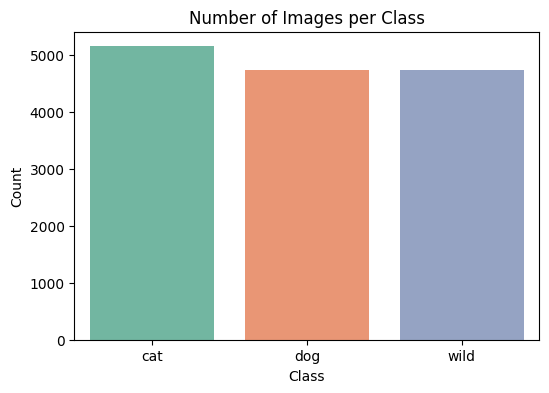

cat     5153
dog     4739
wild    4738
Name: count, dtype: int64


In [4]:
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore", category=FutureWarning)
class_counts = pd.Series(labels).value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="Set2")
plt.title("Number of Images per Class")
plt.xlabel("Class"); plt.ylabel("Count")
plt.show()

print(class_counts)


**💡Explanation of code above:**  

This code calculates the number of images in each category (`cat`, `dog`, and `wild`) using a pandas `value_counts()` function and visualizes the class distribution with a Seaborn bar plot. The output shows that the dataset is well-balanced, with approximately 5,000 images per class. This balance ensures that no class dominates the analysis and helps maintain fairness during unsupervised learning or clustering.

#### 3.3.3 Image dimensions

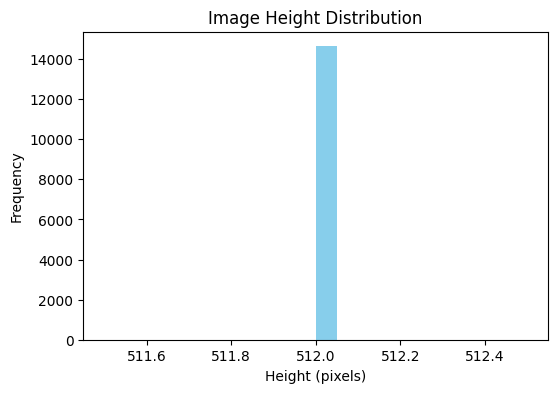

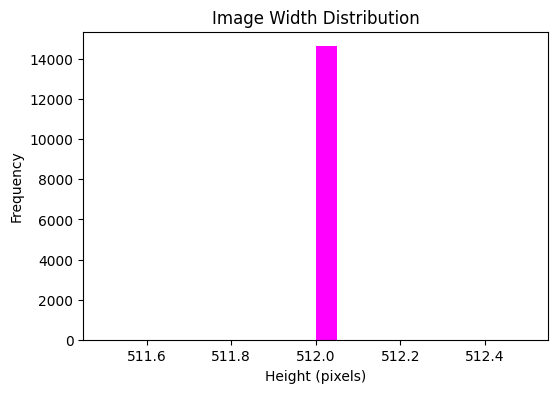

In [5]:
heights, widths = zip(*[img.shape[:2] for img in data])
plt.figure(figsize=(6,4))
plt.hist(heights, bins=20, color='skyblue')
plt.title("Image Height Distribution")
plt.xlabel("Height (pixels)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(widths, bins=20, color='magenta')
plt.title("Image Width Distribution")
plt.xlabel("Height (pixels)")
plt.ylabel("Frequency")
plt.show()

**💡Explanation of code above:**  
Both histograms confirm that all images have a uniform resolution of 512 × 512 pixels — an important property for consistent feature extraction and model input.

#### 3.3.4 RGB channel intensities per class

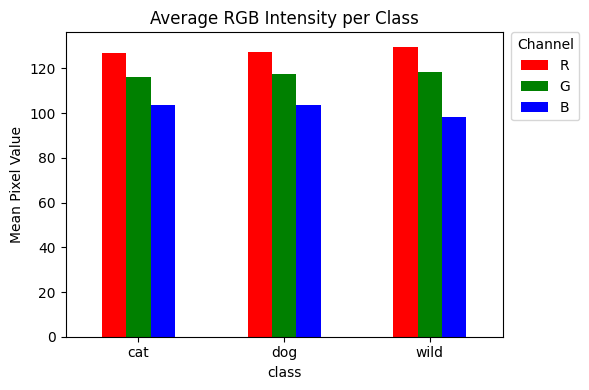

In [6]:
means = {'class': [], 'R': [], 'G': [], 'B': []}

for cls in np.unique(labels):
    imgs = np.array([data[i] for i in range(len(data)) if labels[i] == cls])
    mean_rgb = imgs.mean(axis=(0, 1, 2))
    means['class'].append(cls)
    means['R'].append(mean_rgb[0])
    means['G'].append(mean_rgb[1])
    means['B'].append(mean_rgb[2])

df_means = pd.DataFrame(means)

# Plot with cleaner layout
ax = df_means.set_index('class').plot(
    kind='bar',
    figsize=(6, 4),
    color=['r', 'g', 'b'],
    legend=True
)

plt.title("Average RGB Intensity per Class")
plt.ylabel("Mean Pixel Value")
plt.xticks(rotation=0)  # keeps labels horizontal
plt.legend(title="Channel", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()  # adjusts spacing to fit legend cleanly
plt.show()


**💡Explanation of code above:**  
This bar chart shows the average RGB channel intensities for each class, indicating that the dataset’s images are generally warmer in tone, with slightly higher red intensity values compared to green and blue.

#### 3.3.5 Brightness / grayscale distribution

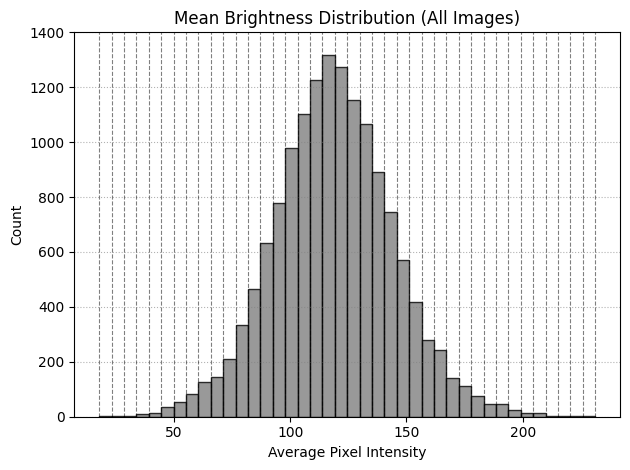

In [7]:
gray_means = []

for img in data:
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_means.append(gray.mean())

# Plot histogram and capture bin data
counts, bins, patches = plt.hist(gray_means, bins=40, color='gray', edgecolor='black', alpha=0.8)

# Draw vertical bin lines
for b in bins:
    plt.axvline(x=b, color='black', linestyle='--', linewidth=0.8, alpha=0.5)

# Add horizontal gridlines
plt.grid(axis='y', linestyle=':', color='gray', alpha=0.6)

# Force specific y-ticks (add 1400)
y_ticks = list(plt.yticks()[0])          # get current ticks
if 1400 not in y_ticks:
    y_ticks.append(1400)                 # add 1400 manually
y_ticks = sorted(set(y_ticks))           # remove duplicates and sort
plt.yticks(y_ticks)

plt.title("Mean Brightness Distribution (All Images)")
plt.xlabel("Average Pixel Intensity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


**💡Explanation of code above:**  
This histogram illustrates the distribution of **mean brightness** values across all images in the dataset.  
In digital imaging, **brightness** refers to the *average luminance or pixel intensity* of an image — a measure of how light or dark an image appears when converted to grayscale, where pixel values range from **0 (black)** to **255 (white)**.  

In grayscale conversion, each pixel’s intensity is computed as a weighted sum of its RGB components:

$$Y = 0.299R + 0.587G + 0.114B$$

where the constants correspond to the standard luminance coefficients defined in the **OpenCV** implementation.  

Most images in the dataset have mean brightness values between **90 and 150**, forming a near-normal, bell-shaped curve centered around **~120**. This indicates that the dataset contains **well-exposed images** with balanced illumination — neither underexposed nor overexposed. Such uniform brightness ensures that lighting variations do not bias feature learning, resulting in more consistent and robust model performance during unsupervised analysis.  

**Sources:**  
- [Digital Image Processing — Brightness and Contrast (TutorialsPoint)](https://www.tutorialspoint.com/dip/brightness_and_contrast.htm)  
- [Grayscale — Wikipedia](https://en.wikipedia.org/wiki/Grayscale)  
- [OpenCV Documentation — Color Conversions](https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html)
- [Stackover Flow Discussion on Luminance](https://stackoverflow.com/questions/596216/formula-to-determine-perceived-brightness-of-rgb-color)


##### Summary of Section 3.3 — Dataset Composition and Descriptive Summary

This section performed an exploratory analysis of the AFHQ dataset to understand its composition, structure, and fundamental visual properties before applying unsupervised learning methods.

- **Dataset Overview:**
The dataset contains a total of 14,630 color images evenly distributed across three balanced categories — Cat (5,153), Dog (4,739), and Wild (4,738) — ensuring no class imbalance.

- **Image Structure:**
Each image is a 512 × 512 RGB tensor, representing 786,432 total pixel values per image.
The resolution is perfectly consistent across all files, simplifying preprocessing and guaranteeing compatibility for downstream feature extraction and clustering.

- **Color and Intensity Distribution:**
The average RGB channel means were approximately R = 128.1, G = 117.7, and B = 101.8, indicating that images tend to have slightly warmer tones (mild red dominance).
Pixel intensity ranges and standard deviations (≈ 28) revealed moderate variability in color brightness, typical of naturally lit animal photographs.

- **Brightness and Exposure:**
The mean brightness histogram (computed from grayscale luminance `Y = 0.299R + 0.587G + 0.114B`) showed a bell-shaped distribution centered around ~120, confirming that most images are well-exposed with balanced illumination.
This uniform exposure minimizes the influence of lighting differences on model training.

- **Data Integrity:**
No missing or corrupted files were detected, and all pixel values lie within the expected 0–255 range, confirming that the dataset is clean and ready for analysis.

Overall, the EDA confirms that the AFHQ dataset is well-balanced, high-quality, and visually consistent, providing a strong foundation for unsupervised learning tasks such as feature extraction, clustering, or representation learning.

#### 3.4 Feature Correlations and Visual Patterns

In this section, we explore how the RGB color channels relate to each other and what visual patterns exist across the three animal classes.
The goal is to see if certain color channels are strongly correlated, if there are any noticeable outliers, and whether different classes show unique color intensity trends.
These insights help us understand how consistent the dataset’s color information is and whether any preprocessing or normalization might be needed before applying unsupervised learning methods.

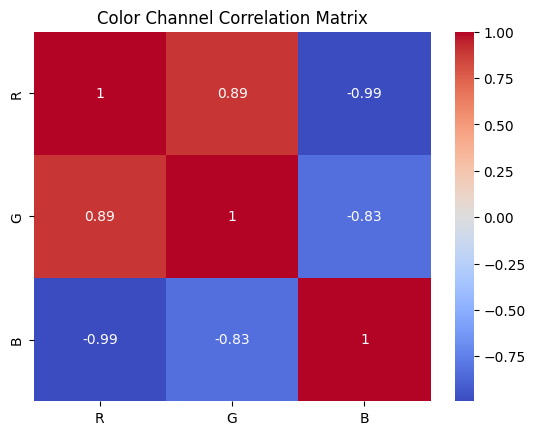

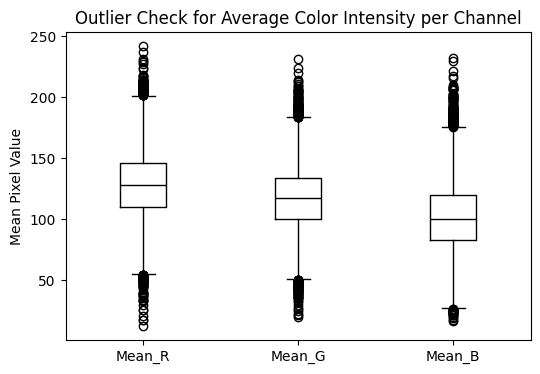

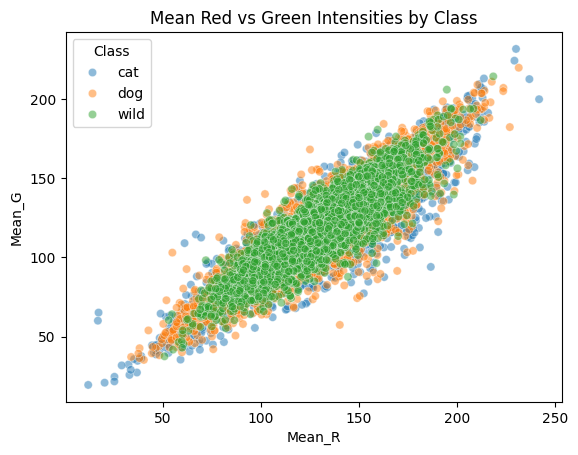

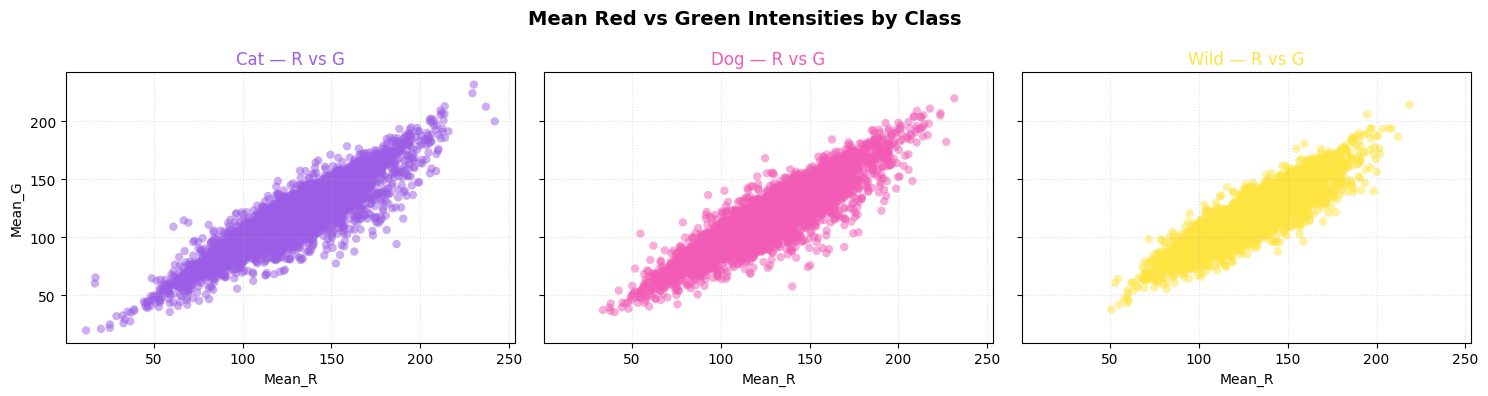

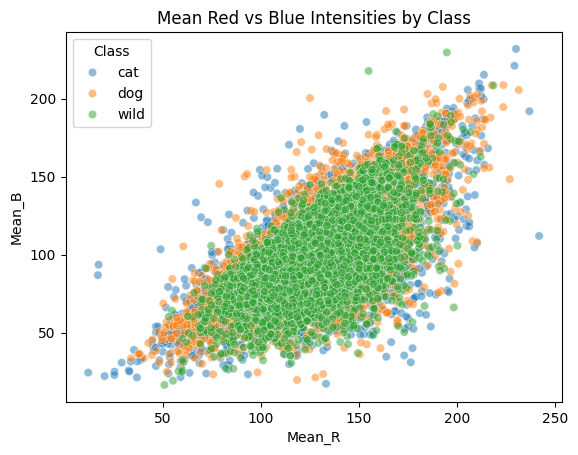

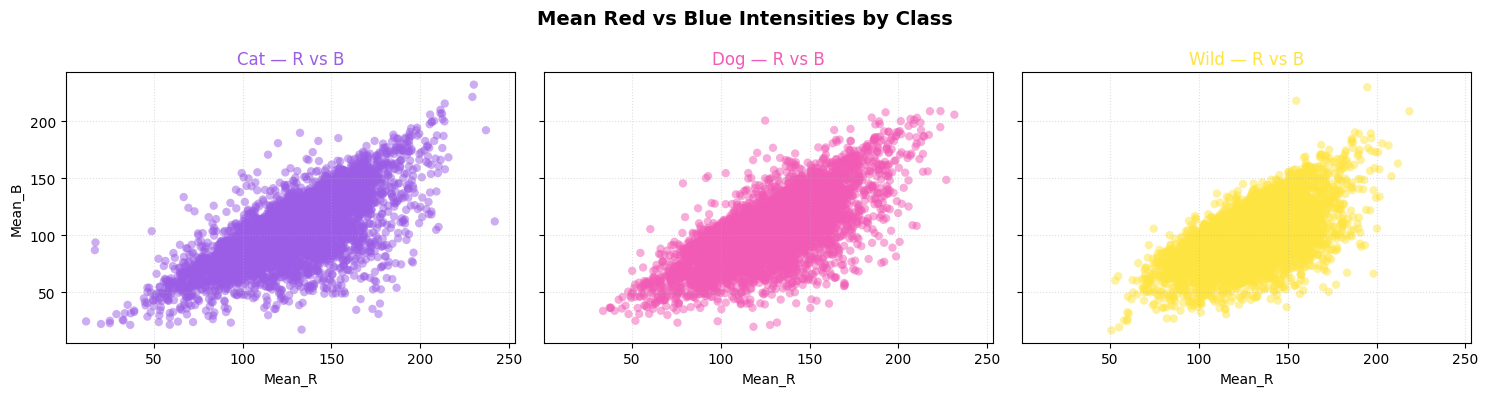

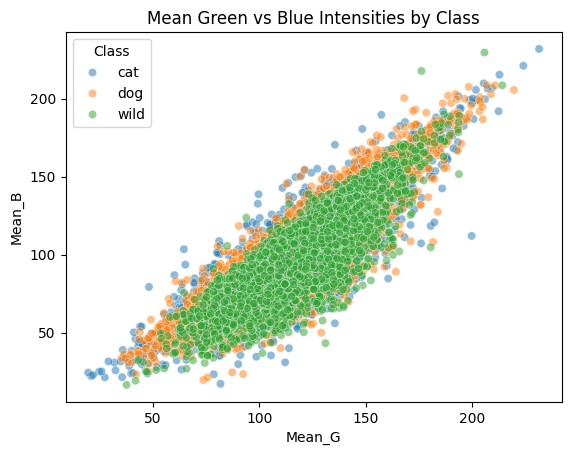

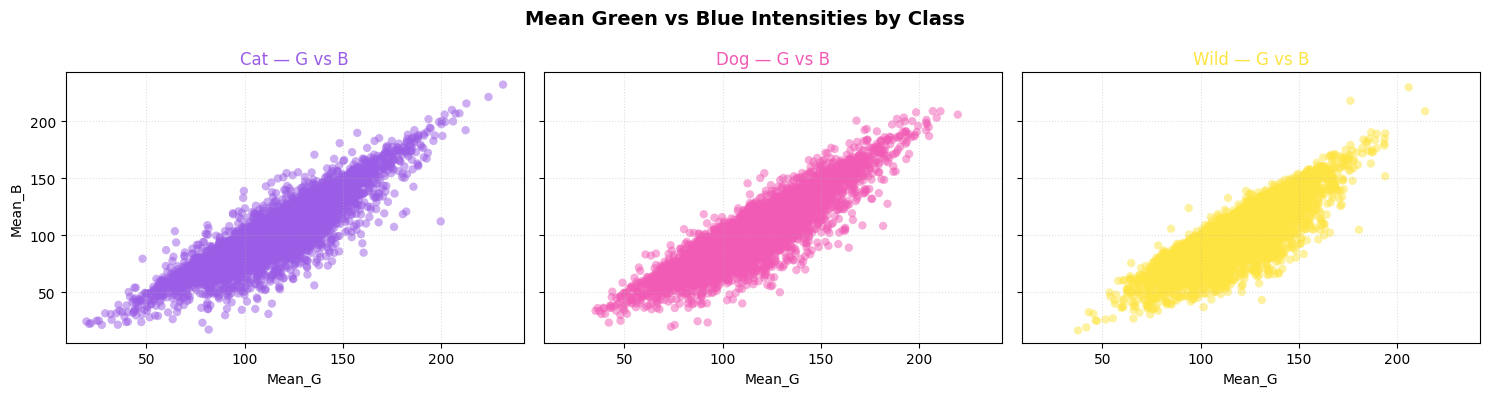

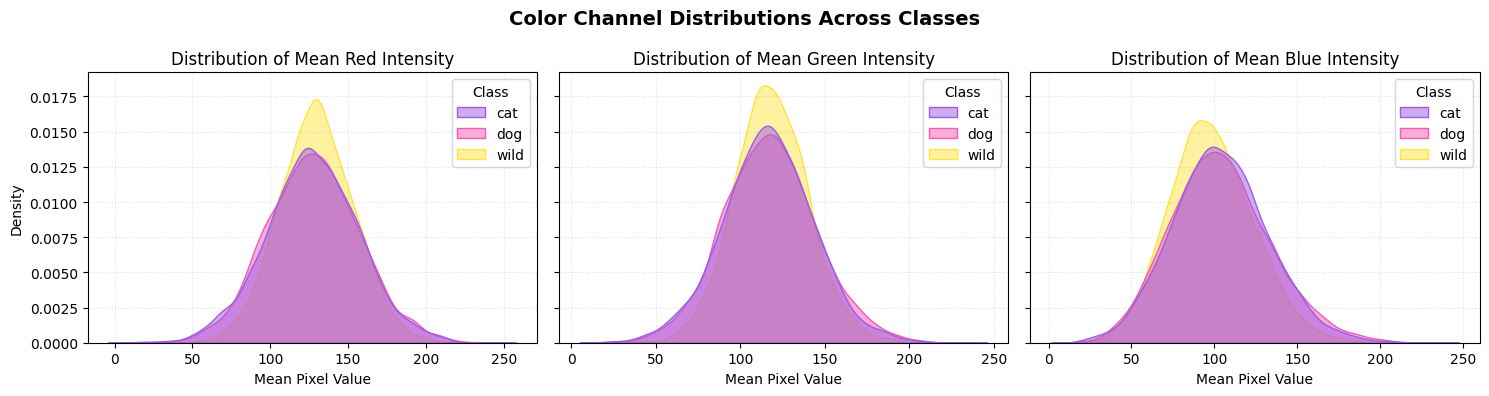

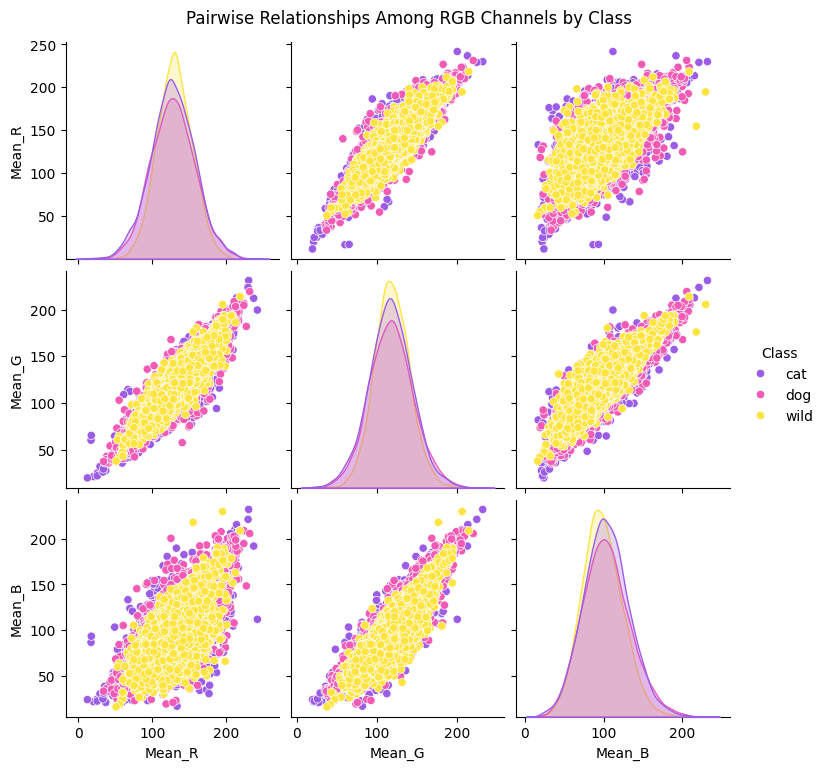

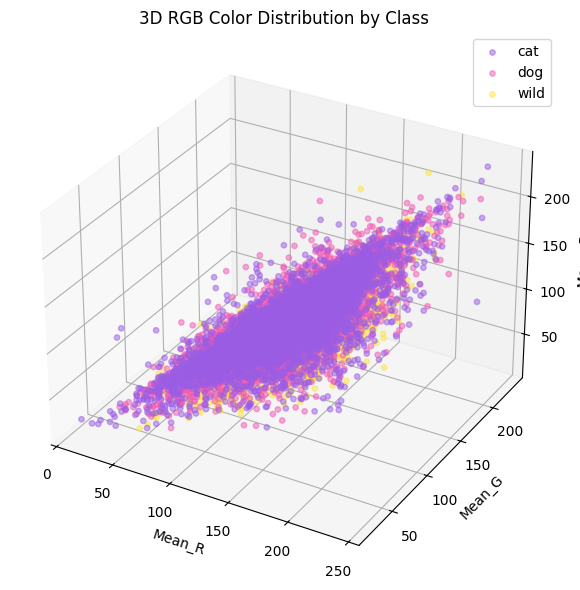

In [8]:
corr = df_means[['R','G','B']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Color Channel Correlation Matrix")
plt.show()

df_summary[['Mean_R','Mean_G','Mean_B']].plot.box(figsize=(6,4), color='black')
plt.title("Outlier Check for Average Color Intensity per Channel")
plt.ylabel("Mean Pixel Value")
plt.show()


# Custom pastel palette (purple, pink, gold)
custom_palette = ["#9b5de5", "#f15bb5", "#fee440"]

sns.scatterplot(data=df_summary, x='Mean_R', y='Mean_G', hue='Class', alpha=0.5)
plt.title("Mean Red vs Green Intensities by Class")
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(15,4), sharex=True, sharey=True)
for ax, (cls, color) in zip(axes, zip(classes, custom_palette)):
    subset = df_summary[df_summary['Class'] == cls]
    sns.scatterplot(
        data=subset, x='Mean_R', y='Mean_G',
        alpha=0.5, ax=ax, color=color, edgecolor='none'
    )
    ax.set_title(f"{cls.capitalize()} — R vs G", fontsize=12, color=color)
    ax.set_xlabel("Mean_R")
    ax.set_ylabel("Mean_G")
    ax.grid(True, linestyle=":", alpha=0.4)
plt.suptitle("Mean Red vs Green Intensities by Class", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# Mean Red vs Blue Intensities by Class
sns.scatterplot(data=df_summary, x='Mean_R', y='Mean_B', hue='Class', alpha=0.5)
plt.title("Mean Red vs Blue Intensities by Class")
plt.xlabel("Mean_R")
plt.ylabel("Mean_B")
plt.show()

# Per-class subplots (R vs B)
fig, axes = plt.subplots(1, 3, figsize=(15,4), sharex=True, sharey=True)
for ax, (cls, color) in zip(axes, zip(classes, custom_palette)):
    subset = df_summary[df_summary['Class'] == cls]
    sns.scatterplot(
        data=subset, x='Mean_R', y='Mean_B',
        alpha=0.5, ax=ax, color=color, edgecolor='none'
    )
    ax.set_title(f"{cls.capitalize()} — R vs B", fontsize=12, color=color)
    ax.set_xlabel("Mean_R")
    ax.set_ylabel("Mean_B")
    ax.grid(True, linestyle=":", alpha=0.4)
plt.suptitle("Mean Red vs Blue Intensities by Class", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# Mean Green vs Blue Intensities by Class
sns.scatterplot(data=df_summary, x='Mean_G', y='Mean_B', hue='Class', alpha=0.5)
plt.title("Mean Green vs Blue Intensities by Class")
plt.xlabel("Mean_G")
plt.ylabel("Mean_B")
plt.show()

# Per-class subplots (G vs B)
fig, axes = plt.subplots(1, 3, figsize=(15,4), sharex=True, sharey=True)
for ax, (cls, color) in zip(axes, zip(classes, custom_palette)):
    subset = df_summary[df_summary['Class'] == cls]
    sns.scatterplot(
        data=subset, x='Mean_G', y='Mean_B',
        alpha=0.5, ax=ax, color=color, edgecolor='none'
    )
    ax.set_title(f"{cls.capitalize()} — G vs B", fontsize=12, color=color)
    ax.set_xlabel("Mean_G")
    ax.set_ylabel("Mean_B")
    ax.grid(True, linestyle=":", alpha=0.4)
plt.suptitle("Mean Green vs Blue Intensities by Class", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


# Compute grayscale brightness using standard luminance coefficients
df_summary['Brightness'] = 0.299*df_summary['Mean_R'] + 0.587*df_summary['Mean_G'] + 0.114*df_summary['Mean_B']

# Correlation matrix including brightness
# corr_extended = df_summary[['Mean_R', 'Mean_G', 'Mean_B', 'Brightness']].corr()


# Plot individual channel distributions per class
fig, axes = plt.subplots(1, 3, figsize=(15,4), sharey=True)

channels = ['Mean_R', 'Mean_G', 'Mean_B']
titles = ['Distribution of Mean Red Intensity', 
          'Distribution of Mean Green Intensity', 
          'Distribution of Mean Blue Intensity']

for ax, ch, title in zip(axes, channels, titles):
    sns.kdeplot(
        data=df_summary, 
        x=ch, 
        hue='Class', 
        fill=True, 
        common_norm=False, 
        palette=custom_palette, 
        alpha=0.5, 
        ax=ax
    )
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("Mean Pixel Value")
    ax.set_ylabel("Density")
    ax.grid(True, linestyle=":", alpha=0.4)

plt.suptitle("Color Channel Distributions Across Classes", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


# Pairplot for RGB means
sns.pairplot(df_summary[['Mean_R', 'Mean_G', 'Mean_B', 'Class']], hue='Class', diag_kind='kde', palette=custom_palette)
plt.suptitle("Pairwise Relationships Among RGB Channels by Class", y=1.02)
plt.show()



fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

colors = {'cat': '#9b5de5', 'dog': '#f15bb5', 'wild': '#fee440'}

for cls in classes:
    subset = df_summary[df_summary['Class'] == cls]
    ax.scatter(subset['Mean_R'], subset['Mean_G'], subset['Mean_B'],
               color=colors[cls], label=cls, alpha=0.5, s=15)

ax.set_xlabel('Mean_R')
ax.set_ylabel('Mean_G')
ax.set_zlabel('Mean_B')
ax.set_title("3D RGB Color Distribution by Class")
ax.legend()
plt.tight_layout()
plt.show()




**💡Explanation of results above:**  

This section explores the relationships between the RGB color channels and visual intensity patterns across the AFHQ dataset.

- **Color Channel Correlation Matrix:**  
  The heatmap shows that the Red and Green channels are strongly correlated (**r ≈ 0.89**), while both have strong negative correlations with Blue (**r ≈ –0.99 / –0.83**).  
  In simpler terms, when an image has more red and green (warmer tones), it tends to have less blue — which is pretty typical for natural lighting and animal fur.

- **Boxplot (Outlier Check):**  
  Each channel has a steady median intensity around **120–130**, with only a few extreme outliers.  
  That means most images are evenly exposed — not too bright, not too dark — and the dataset does not have color balance issues or washed-out samples.

- **Pairwise Scatterplots (R vs G, R vs B, G vs B):**  
  The dense diagonal lines in the scatterplots show strong linear relationships between all color channels.  
  When looking by class, the color distributions are quite similar overall — though wild animals lean a bit more blue, and cats and dogs are slightly warmer.  
  It’s a nice sign of consistent color calibration with just small, natural variations between species.

- **Channel-wise Density Distributions:**  
  The overlapping, bell-shaped curves for Cat, Dog, and Wild suggest that pixel intensities follow a roughly normal distribution centered around **120 ± 25**.  
  While all three classes share similar distributions, the **wild** category shows slightly higher density peaks across R, G, and B channels — indicating that wild animal images tend to be a bit brighter and more saturated overall.  
  The strong overlap across classes still confirms balanced exposure and consistent color tone throughout the dataset.

- **Pairplot Summary:**  
  The pairplot basically combines all those relationships in one grid, and it shows the same story — smooth color gradients and nearly linear trends between R, G, and B.

- **3D RGB Scatter Plot:**  
  In 3D space, all three animal groups sit in overlapping regions, with only slight shifts in tone.  
  That shows class differences are more about subtle textures and patterns rather than drastic color changes — exactly what you’d hope to see before running unsupervised models.


---

##### 🟩 Overall Interpretation

The EDA shows that:  
- Red and Green channels are strongly correlated, while Blue varies inversely — reflecting the natural balance between warm and cool tones in animal images.  
- Lighting and exposure are generally consistent across classes, with wild images appearing slightly brighter on average.
- There are no major color outliers or illumination issues.  

Together, these findings confirm that **AFHQ’s color features are coherent, balanced, and well-suited for unsupervised analysis** such as clustering or feature extraction.



#### 3.5 Data Quality and Cleaning

This section is short since it is known the data quality of the **AFHQ** is high quality.

In [9]:
import os

total = len(labels)
valid = sum([img is not None for img in data])
print(f"Valid images: {valid}/{total}")


Valid images: 14630/14630


**💡Explanation of code above:**  

As shown in the previous plots and verified by the code above, the dataset is clean, complete, and ready for use.

#### 3.6 Transformations and Normalization

Since the RGB channel values are already on the same scale (0–255) and exhibit similar distributions across classes, no additional transformation is required at this stage.  
However, we can normalize the dataset **in place** for models that expect input values within the [0, 1] range.  
Maintaining a separate normalized copy of the dataset is prohibitively expensive (`MemoryError: Unable to allocate 42.9 GiB for an array with shape (14630, 512, 512, 3) and data type float32`), since floating-point values are more memory-intensive than `uint8`.

To mitigate this, alternative approaches include:  
- Downsampling images to `128×128` pixels  
- Using grayscale versions of the images  
- Normalizing data **on the fly** during model training or feature extraction  
- Using **memory-mapped arrays** (`np.memmap`) to handle normalized data efficiently without fully loading it into memory  

Normalization can be applied just before model input or feature extraction to ensure compatibility with most machine learning workflows.  
For downstream unsupervised tasks such as PCA or clustering, standard normalization or min–max scaling may be applied to ensure feature comparability, but logarithmic or other nonlinear transformations are unnecessary.



In [10]:
# data_norm = data.astype(np.float32)
# np.divide(data_norm, 255.0, out=data_norm)

# print(data_norm.min(), data_norm.max())

# ---------------------------------------------------------------------------
# MemoryError                               Traceback (most recent call last)
# Cell In[10], line 1
# ----> 1 data_norm = data.astype(np.float32)
#       2 np.divide(data_norm, 255.0, out=data_norm)
#       4 print(data_norm.min(), data_norm.max())

# MemoryError: Unable to allocate 42.9 GiB for an array with shape (14630, 512, 512, 3) and data type float32

Although all three color channels (R, G, and B) have similar ranges and balanced distributions—making additional transformations such as log scaling unnecessary—it is still useful to apply **edge detection** to reduce the image data to its most informative structural features (i.e., object boundaries, shapes, and textures).

**💡Explanation of code below:**  
This code outputs the original RGB, as well as the three common edge detection techniques side by side, highlighting different visual details from the same image.

- **Canny:** Detects the strongest edges and outlines (like the whiskers and eyes). It gives a clean, black-and-white look that focuses only on major edges.  
- **Sobel:** Captures softer gradients and textures. You can still see the fur and fine details, but with smoother transitions.  
- **Laplacian:** Picks up very subtle edges and changes in brightness. It can look noisy, but helps reveal faint details that other filters might miss.  

Overall, each method captures different kinds of information — structure, texture, and fine detail — which can be useful for feature extraction or unsupervised learning later on.

Sources:
- [**Edge Detection using OpenCV (Official Blog)**](https://opencv.org/blog/edge-detection-using-opencv/)  
- [**Edge Detection - LearnOpenCV**](https://learnopencv.com/edge-detection-using-opencv/)

Generating edge-detected datasets (Canny, Sobel, Laplacian)...


Processing wild: 100%|██████████| 4738/4738 [00:33<00:00, 143.50it/s]


✅ Canny shape: (14630, 512, 512)
✅ Sobel shape: (14630, 512, 512)
✅ Laplacian shape: (14630, 512, 512)
Approx. total memory use (GB): 10.72
⚠️ Missing or unreadable files: 0

💾 Starting background saves...
⚙️ [Async Save Started] Saving AFHQ_edges_canny.pkl (3.57 GB) in background...
⚙️ [Async Save Started] Saving AFHQ_edges_sobel.pkl (3.57 GB) in background...
⚙️ [Async Save Started] Saving AFHQ_edges_laplacian.pkl (3.57 GB) in background...


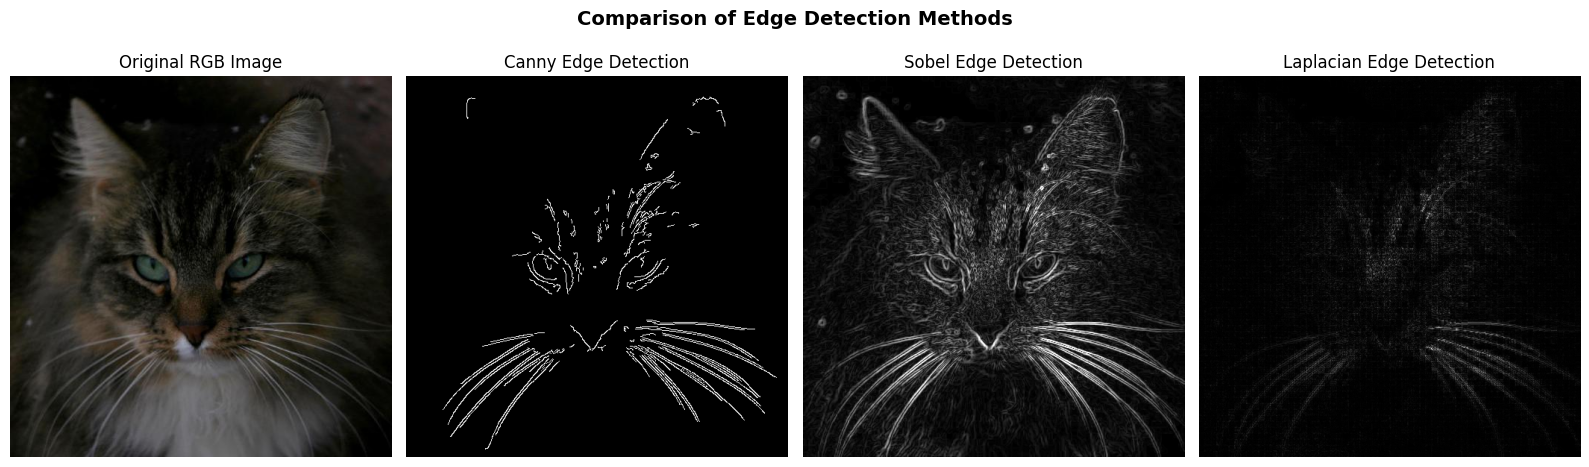

✅ [Async Save Complete] AFHQ_edges_canny.pkl (3.57 GB) saved to d:\Documents\GitHub\csca5632-final-project\data\AFHQ_edges_canny.pkl
✅ [Async Save Complete] AFHQ_edges_laplacian.pkl (3.57 GB) saved to d:\Documents\GitHub\csca5632-final-project\data\AFHQ_edges_laplacian.pkl
✅ [Async Save Complete] AFHQ_edges_sobel.pkl (3.57 GB) saved to d:\Documents\GitHub\csca5632-final-project\data\AFHQ_edges_sobel.pkl


In [ ]:
data_edges_canny = []
data_edges_sobel = []
data_edges_laplacian = []
missing = 0

print("Generating edge-detected datasets (Canny, Sobel, Laplacian)...")

# Using float32 here provides negligible improvement in quality compared to integer precision.
# edge_detection_output_int_versio.png vs edge_detection_full_float_version.png
for cls in classes:
    folder = os.path.join(DATA_DIR, cls)
    for fname in tqdm(os.listdir(folder), desc=f"Processing {cls}"):
        fpath = os.path.join(folder, fname)
        img = cv2.imread(fpath)
        if img is None:
            missing += 1
            continue

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # --- 1 Canny Edge Detection ---
        edges_canny = cv2.Canny(gray, threshold1=100, threshold2=200)

        # --- 2 Sobel Edge Detection ---
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
        sobel = cv2.magnitude(sobelx, sobely)
        sobel = np.uint8(np.clip(sobel, 0, 255))

        # --- 3 Laplacian Edge Detection ---
        laplacian = cv2.Laplacian(gray, cv2.CV_64F)
        laplacian = np.uint8(np.clip(np.abs(laplacian), 0, 255))

        # Append all
        data_edges_canny.append(edges_canny)
        data_edges_sobel.append(sobel)
        data_edges_laplacian.append(laplacian)

# Convert all to numpy arrays (uint8)
data_edges_canny = np.array(data_edges_canny, dtype=np.uint8)
data_edges_sobel = np.array(data_edges_sobel, dtype=np.uint8)
data_edges_laplacian = np.array(data_edges_laplacian, dtype=np.uint8)

print("✅ Canny shape:", data_edges_canny.shape)
print("✅ Sobel shape:", data_edges_sobel.shape)
print("✅ Laplacian shape:", data_edges_laplacian.shape)
print("Approx. total memory use (GB):",
      round((data_edges_canny.nbytes +
             data_edges_sobel.nbytes +
             data_edges_laplacian.nbytes) / (1024**3), 2))
print(f"⚠️ Missing or unreadable files: {missing}")

# === Save Each Dataset Asynchronously ===
print("\n💾 Starting background saves...")

save_thread_canny = save_numpy_array_async(data_edges_canny, "AFHQ_edges_canny")
save_thread_sobel = save_numpy_array_async(data_edges_sobel, "AFHQ_edges_sobel")
save_thread_laplacian = save_numpy_array_async(data_edges_laplacian, "AFHQ_edges_laplacian")

# Pick an index (0 = first image, or any number < len(data))
idx = 0  

# Retrieve original and edge-detected versions
img_original = data[idx]
img_canny = data_edges_canny[idx]
img_sobel = data_edges_sobel[idx]
img_laplacian = data_edges_laplacian[idx]

# Plot all side-by-side
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
axes[0].imshow(img_original)
axes[0].set_title("Original RGB Image")
axes[1].imshow(img_canny, cmap="gray")
axes[1].set_title("Canny Edge Detection")
axes[2].imshow(img_sobel, cmap="gray")
axes[2].set_title("Sobel Edge Detection")
axes[3].imshow(img_laplacian, cmap="gray")
axes[3].set_title("Laplacian Edge Detection")

for ax in axes:
    ax.axis("off")

plt.suptitle("Comparison of Edge Detection Methods", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

##### 3.6.1 Managing Memory - A Sidenote

Below is a code snippet for managing memory on systems with less than **64 GB of RAM**. The full dataset (`data`,`data_edges_canny`,`data_edges_sobel`,`data_edges_laplacian`) can be loaded on systems with 64 GB or more of RAM without manually freeing and loading datasets.

In [12]:
# # Safe to free memory after starting async saves — the background thread keeps its own reference ===
# free_variable("data", globals())
# free_variable("data_edges_canny", globals())
# free_variable("data_edges_sobel", globals())
# free_variable("data_edges_laplacian", globals())

# # Wait for all background threads to finish before reloading
# wait_for_threads(save_thread_rgb, save_thread_canny, save_thread_sobel, save_thread_laplacian)

# # ✅ Safe to reload the saved datasets
# data = load_numpy_array("AFHQ_RGB_dataset")
# data_edges_canny = load_numpy_array("AFHQ_edges_canny")
# data_edges_sobel = load_numpy_array("AFHQ_edges_sobel")
# data_edges_laplacian = load_numpy_array("AFHQ_edges_laplacian")

# # 📊 Verify shapes, dtypes, and file sizes
# datasets = {
#     "RGB Dataset": ("AFHQ_RGB_dataset.pkl", data),
#     "Canny Edges": ("AFHQ_edges_canny.pkl", data_edges_canny),
#     "Sobel Edges": ("AFHQ_edges_sobel.pkl", data_edges_sobel),
#     "Laplacian Edges": ("AFHQ_edges_laplacian.pkl", data_edges_laplacian),
# }

# print("\n=== ✅ Dataset Verification Summary ===")
# for name, (fname, arr) in datasets.items():
#     fpath = os.path.join(VAR_DATA_DIR, fname)
#     fsize = get_file_size(fpath)
#     print(f"{name:<20} | Shape: {arr.shape} | Dtype: {arr.dtype} | File size: {fsize} MB")

# # 💾 Print total memory footprint (in RAM)
# total_mem = memory_usage_gb(data, data_edges_canny, data_edges_sobel, data_edges_laplacian)
# print(f"\n💡 Total Memory Usage (all datasets in memory): {total_mem} GB")

Expected Output of the Above Code (if clearing memory usage is required due to low memory system) is:
```python
🧹 Deallocated variable: data
🧹 Deallocated variable: data_edges_canny
🧹 Deallocated variable: data_edges_sobel
🧹 Deallocated variable: data_edges_laplacian
✅ All background saves completed.
✅ Loaded AFHQ_RGB_dataset.pkl (10.72 GB) from d:\Documents\GitHub\csca5632-final-project\data\AFHQ_RGB_dataset.pkl
✅ Loaded AFHQ_edges_canny.pkl (3.57 GB) from d:\Documents\GitHub\csca5632-final-project\data\AFHQ_edges_canny.pkl
✅ Loaded AFHQ_edges_sobel.pkl (3.57 GB) from d:\Documents\GitHub\csca5632-final-project\data\AFHQ_edges_sobel.pkl
✅ Loaded AFHQ_edges_laplacian.pkl (3.57 GB) from d:\Documents\GitHub\csca5632-final-project\data\AFHQ_edges_laplacian.pkl

=== ✅ Dataset Verification Summary ===
RGB Dataset          | Shape: (14630, 512, 512, 3) | Dtype: uint8 | File size: 8788.49 MB
Canny Edges          | Shape: (14630, 512, 512) | Dtype: uint8 | File size: 470.29 MB
Sobel Edges          | Shape: (14630, 512, 512) | Dtype: uint8 | File size: 3349.2 MB
Laplacian Edges      | Shape: (14630, 512, 512) | Dtype: uint8 | File size: 2978.1 MB

💡 Total Memory Usage (all datasets in memory): 21.43 GB
```

#### 3.7 Feature Importance and Hypothesis

It is expected that clustering will be influenced more by **texture**, **shape**, and **edge patterns** (e.g., fur details and facial features) rather than by color alone, as background and lighting conditions vary widely across the dataset.  
Large changes in RGB values that define these textures and contours are likely to form latent patterns that will be revealed during the machine learning stage of this project.

#### 3.8 Summary of EDA Findings

The exploratory data analysis (EDA) provided a detailed understanding of the **AFHQ dataset**, including its visual structure, data integrity, and readiness for downstream machine learning.

- **Data Quality and Balance:**  
  All 14,630 images were successfully loaded and validated. The dataset is clean, balanced, and visually diverse across the three categories (Cat, Dog, Wild). No missing, corrupted, or poorly exposed samples were found.

- **Color Distributions:**  
  The RGB channels showed strong correlations between Red and Green and an inverse relationship with Blue — typical of natural lighting and animal fur tones.  
  Overlapping, bell-shaped distributions indicated well-balanced exposure across classes, confirming no hue or lighting bias.

- **Feature Relationships:**  
  Pairwise scatterplots, 3D RGB projections, and correlation heatmaps showed smooth, near-linear relationships between color channels.  
  These patterns suggest that color alone may not be a strong distinguishing factor among classes.

- **Transformations and Normalization:**  
  Since all RGB channels share similar ranges (0–255) and distributions, global normalization or log transformations were deemed unnecessary.  
  A full normalization attempt triggered a `MemoryError` (~43 GB allocation), highlighting the importance of efficient data handling.  
  Alternatives such as on-the-fly normalization, downsampling, grayscale conversion, and memory-mapped arrays were discussed as practical options.

- **Edge-Based Representations:**  
  Canny, Sobel, and Laplacian edge detection filters were applied to extract structural and textural features.  
  Each method revealed complementary aspects of the same image — from sharp contours (Canny) to fine gradients (Sobel) and subtle intensity changes (Laplacian) — demonstrating the potential of structural features for unsupervised learning.

- **Memory Optimization:**  
  Async save and load mechanisms were implemented to manage large datasets efficiently, reducing memory footprint while maintaining reproducibility.  
  The full RGB and edge-based datasets occupy approximately **21 GB in RAM**, making them feasible for further processing on 64 GB+ RAM systems.

**In summary:**  
The AFHQ dataset is high-quality, balanced, and ready for feature extraction and unsupervised learning.  
Color statistics confirm consistency and neutrality, while edge detection experiments highlight the importance of **texture, shape, and contour features** over raw color values for downstream clustering or representation learning tasks.


### 4. Unsupervised Learning Models and Analysis

### 5. Supervised Baseline (Comparative Analysis)

### 6. Discussion and Conclusions

### 7. Future Improvements and Areas to Explore

### 8. Summary of Results

### 9. References and Acknowledgments

1. **Animal Faces-HQ (AFHQ) Dataset (Kaggle):**  
   https://www.kaggle.com/datasets/andrewmvd/animal-faces

2. **Unsupervised Learning Overview:**  
   https://biztechmagazine.com/article/2025/05/what-are-benefits-unsupervised-machine-learning-and-clustering-perfcon

3. **Applications in Diverse Domains:**  
   https://pmc.ncbi.nlm.nih.gov/articles/PMC7983091/

4. **Data Exploration and Pattern Discovery:**  
   https://analyticalsciencejournals.onlinelibrary.wiley.com/doi/pdfdirect/10.1002/mas.21602

5. **Computer Vision Overview:**  
   https://viso.ai/deep-learning/supervised-vs-unsupervised-learning/

6. **Principal Component Analysis (PCA):**  
   https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

7. **SimCLR Paper (Self-Supervised Learning):**  
   https://arxiv.org/abs/2002.05709

8. **Unsupervised Learning in NLP:**  
   https://milvus.io/ai-quick-reference/what-is-the-role-of-unsupervised-learning-in-nlp

9. **Word2Vec Paper:**  
   https://arxiv.org/abs/1301.3781

10. **Latent Dirichlet Allocation (LDA) Paper:**  
    https://jmlr.org/papers/v3/blei03a.html

11. **Healthcare and Biomedical Applications:**  
    https://pubmed.ncbi.nlm.nih.gov/31891765/

12. **Autonomous Systems and Robotics:**  
    https://fiveable.me/introduction-autonomous-robots/unit-7/unsupervised-learning/study-guide/rNorV1tsC0TeCPOO

13. **Recommender and Personalization Systems:**  
    https://www.mdpi.com/2073-8994/12/2/185

14. **t-SNE Algorithm:**  
    https://lvdmaaten.github.io/tsne/

15. **PCA (Scikit-learn Implementation):**  
    https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

16. **K-Means Clustering:**  
    https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

17. **DBSCAN Clustering:**  
    https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

18. **Agglomerative Clustering:**  
    https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

19. **Silhouette Score:**  
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

20. **Adjusted Rand Index (ARI):**  
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

21. **Normalized Mutual Information (NMI):**  
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html

22. **Understanding Digital Images for Image Processing and Computer Vision (Medium):**  
    https://medium.com/%40md-jewel/understanding-digital-images-for-image-processing-and-computer-vision-part-1-cc42be78cca1  

23. **RGB Color Model — Wikipedia:**  
    https://en.wikipedia.org/wiki/RGB_color_model  

24. **Image Abstractions — MIT Computational Thinking:**  
    https://computationalthinking.mit.edu/Fall22/images_abstractions/images/  

25. **Understanding Image Data Representation in Computer Systems (DEV Community):**  
    https://dev.to/adityabhuyan/understanding-image-data-representation-in-computer-systems-4kdm  

26. **Digital Image Processing — Wikipedia:**  
    https://en.wikipedia.org/wiki/Digital_image_processing

27. **Digital Image Processing — Brightness and Contrast (TutorialsPoint):**  
    https://www.tutorialspoint.com/dip/brightness_and_contrast.htm

28. **Grayscale — Wikipedia:**  
    https://en.wikipedia.org/wiki/Grayscale

29. **OpenCV Documentation — Color Conversions:**  
    https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html

30. **Stackover Flow Discussion on Luminance:**  
    https://stackoverflow.com/questions/596216/formula-to-determine-perceived-brightness-of-rgb-color

31. **Edge Detection using OpenCV (Official Blog):**  
    https://opencv.org/blog/edge-detection-using-opencv/

32. **Edge Detection - LearnOpenCV:**  
    (https://learnopencv.com/edge-detection-using-opencv/)
